In [69]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [70]:
df = pd.read_excel(r'C:\Users\Parachute\Desktop\Database\Education\Harvard_R\anz_data.xlsx')

In [71]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Evaluating Missing Data

In [72]:
missing_data = df.isnull()
missing_data.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

status
False    12043
Name: status, dtype: int64

card_present_flag
False    7717
True     4326
Name: card_present_flag, dtype: int64

bpay_biller_code
True     11158
False      885
Name: bpay_biller_code, dtype: int64

account
False    12043
Name: account, dtype: int64

currency
False    12043
Name: currency, dtype: int64

long_lat
False    12043
Name: long_lat, dtype: int64

txn_description
False    12043
Name: txn_description, dtype: int64

merchant_id
False    7717
True     4326
Name: merchant_id, dtype: int64

merchant_code
True     11160
False      883
Name: merchant_code, dtype: int64

first_name
False    12043
Name: first_name, dtype: int64

balance
False    12043
Name: balance, dtype: int64

date
False    12043
Name: date, dtype: int64

gender
False    12043
Name: gender, dtype: int64

age
False    12043
Name: age, dtype: int64

merchant_suburb
False    7717
True     4326
Name: merchant_suburb, dtype: int64

merchant_state
False    7717
True     4326
Name: merchant_state, dtyp

# Understanding Data Types

In [74]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

# Calculating Annual Salary for each customer based on unique customer ID

anz = pd.DataFrame(df)
normalized_amount = anz['amount']/anz['amount'].max()
anz['normalized_amount'] = normalized_amount
anz

In [75]:
anz = pd.DataFrame(df)
salaries = anz.loc[anz['txn_description'] == "PAY/SALARY"]
salaries

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,...,26,NaN,NaN,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit
12000,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,30,NaN,NaN,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit
12001,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit
12003,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,...,20,NaN,NaN,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit


In [76]:
salaries.reset_index(drop=True, inplace=True)
salaries

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
1,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
2,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
3,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
4,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,...,26,NaN,NaN,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit
879,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,30,NaN,NaN,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit
880,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit
881,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,...,20,NaN,NaN,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit


In [77]:
salary = salaries.drop(['card_present_flag', 'merchant_id', 'merchant_code', 'merchant_suburb', 'merchant_state', 'merchant_long_lat'], axis = 1) 
salary # dropping extra columns 

,status,bpay_biller_code,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement
0,posted,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,Isaiah,8342.11,2018-08-01,M,23,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,credit
1,posted,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,Marissa,2040.58,2018-08-01,F,23,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,credit
2,posted,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,Eric,3158.51,2018-08-01,M,22,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,credit
3,posted,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,Jeffrey,2517.66,2018-08-01,M,24,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,credit
4,posted,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,Kristin,2271.79,2018-08-01,F,43,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,posted,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,Antonio,9378.51,2018-10-31,M,26,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,credit
879,posted,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,Michele,3440.01,2018-10-31,F,30,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,credit
880,posted,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,Tyler,11381.44,2018-10-31,M,69,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,credit
881,posted,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,Susan,11454.52,2018-10-31,F,20,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,credit


In [78]:
salary.sort_values(by=['customer_id', 'date'], inplace=True)
salary.reset_index(drop=True, inplace=True)
salary

,status,bpay_biller_code,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement
0,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1011.87,2018-08-07,F,53,2018-08-07T16:00:00.000+0000,970.47,33c2b30f5b064710a53a45ef89460e16,Australia,CUS-1005756958,credit
1,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1398.70,2018-08-14,F,53,2018-08-14T16:00:00.000+0000,970.47,deaff82de78840f08a035e5404ce5e29,Australia,CUS-1005756958,credit
2,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1853.47,2018-08-21,F,53,2018-08-21T16:00:00.000+0000,970.47,71cd874fc20741f8b4a589c8286afeb2,Australia,CUS-1005756958,credit
3,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,2099.14,2018-08-28,F,53,2018-08-28T16:00:00.000+0000,970.47,9bcd1945ef0a43b5a59d0ba2cf2ee4df,Australia,CUS-1005756958,credit
4,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,2793.61,2018-09-04,F,53,2018-09-04T16:00:00.000+0000,970.47,e588bd113b3645ee82fb386e336c42a1,Australia,CUS-1005756958,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,10636.12,2018-09-03,F,19,2018-09-03T17:00:00.000+0000,3977.46,fcbe30a25f774e7c80d5b94d991a6d15,Australia,CUS-883482547,credit
879,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,11850.78,2018-09-17,F,19,2018-09-17T17:00:00.000+0000,3977.46,e4b6c13973724177875982372bfeb1f3,Australia,CUS-883482547,credit
880,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,14850.71,2018-10-01,F,19,2018-10-01T17:00:00.000+0000,3977.46,fd601d147cb144279b862f83dce3f72a,Australia,CUS-883482547,credit
881,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,17663.99,2018-10-15,F,19,2018-10-15T17:00:00.000+0000,3977.46,237ce909ec984191b6229ec39d82a99c,Australia,CUS-883482547,credit


In [79]:
salary['frequency'] = salary.groupby(['customer_id'])['account'].transform('count')
salary

,status,bpay_biller_code,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,frequency
0,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1011.87,2018-08-07,F,53,2018-08-07T16:00:00.000+0000,970.47,33c2b30f5b064710a53a45ef89460e16,Australia,CUS-1005756958,credit,13
1,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1398.70,2018-08-14,F,53,2018-08-14T16:00:00.000+0000,970.47,deaff82de78840f08a035e5404ce5e29,Australia,CUS-1005756958,credit,13
2,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1853.47,2018-08-21,F,53,2018-08-21T16:00:00.000+0000,970.47,71cd874fc20741f8b4a589c8286afeb2,Australia,CUS-1005756958,credit,13
3,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,2099.14,2018-08-28,F,53,2018-08-28T16:00:00.000+0000,970.47,9bcd1945ef0a43b5a59d0ba2cf2ee4df,Australia,CUS-1005756958,credit,13
4,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,2793.61,2018-09-04,F,53,2018-09-04T16:00:00.000+0000,970.47,e588bd113b3645ee82fb386e336c42a1,Australia,CUS-1005756958,credit,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,10636.12,2018-09-03,F,19,2018-09-03T17:00:00.000+0000,3977.46,fcbe30a25f774e7c80d5b94d991a6d15,Australia,CUS-883482547,credit,7
879,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,11850.78,2018-09-17,F,19,2018-09-17T17:00:00.000+0000,3977.46,e4b6c13973724177875982372bfeb1f3,Australia,CUS-883482547,credit,7
880,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,14850.71,2018-10-01,F,19,2018-10-01T17:00:00.000+0000,3977.46,fd601d147cb144279b862f83dce3f72a,Australia,CUS-883482547,credit,7
881,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,17663.99,2018-10-15,F,19,2018-10-15T17:00:00.000+0000,3977.46,237ce909ec984191b6229ec39d82a99c,Australia,CUS-883482547,credit,7


In [80]:
frequency_per_yr = (365*salary['frequency']/92)
salary['frequency_per_yr'] = frequency_per_yr
annual_salary = (salary['amount']*salary['frequency_per_yr'])
salary ['annual_salary'] = annual_salary
salary #calculating salary over 365 days aka a year from salary frequency and amount per year 

,status,bpay_biller_code,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,frequency,frequency_per_yr,annual_salary
0,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1011.87,2018-08-07,F,53,2018-08-07T16:00:00.000+0000,970.47,33c2b30f5b064710a53a45ef89460e16,Australia,CUS-1005756958,credit,13,51.576087,50053.045109
1,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1398.70,2018-08-14,F,53,2018-08-14T16:00:00.000+0000,970.47,deaff82de78840f08a035e5404ce5e29,Australia,CUS-1005756958,credit,13,51.576087,50053.045109
2,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,1853.47,2018-08-21,F,53,2018-08-21T16:00:00.000+0000,970.47,71cd874fc20741f8b4a589c8286afeb2,Australia,CUS-1005756958,credit,13,51.576087,50053.045109
3,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,2099.14,2018-08-28,F,53,2018-08-28T16:00:00.000+0000,970.47,9bcd1945ef0a43b5a59d0ba2cf2ee4df,Australia,CUS-1005756958,credit,13,51.576087,50053.045109
4,posted,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,Stephanie,2793.61,2018-09-04,F,53,2018-09-04T16:00:00.000+0000,970.47,e588bd113b3645ee82fb386e336c42a1,Australia,CUS-1005756958,credit,13,51.576087,50053.045109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,10636.12,2018-09-03,F,19,2018-09-03T17:00:00.000+0000,3977.46,fcbe30a25f774e7c80d5b94d991a6d15,Australia,CUS-883482547,credit,7,27.771739,110460.981522
879,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,11850.78,2018-09-17,F,19,2018-09-17T17:00:00.000+0000,3977.46,e4b6c13973724177875982372bfeb1f3,Australia,CUS-883482547,credit,7,27.771739,110460.981522
880,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,14850.71,2018-10-01,F,19,2018-10-01T17:00:00.000+0000,3977.46,fd601d147cb144279b862f83dce3f72a,Australia,CUS-883482547,credit,7,27.771739,110460.981522
881,posted,0,ACC-1710017148,AUD,150.82 -34.01,PAY/SALARY,Michelle,17663.99,2018-10-15,F,19,2018-10-15T17:00:00.000+0000,3977.46,237ce909ec984191b6229ec39d82a99c,Australia,CUS-883482547,credit,7,27.771739,110460.981522


In [81]:
#grouping based on customer ID and average of numerical values
import numpy as np
df1=salary.groupby("customer_id").mean()
df1.head()
df1 = df1.reset_index()
df1.head()

,customer_id,balance,age,amount,frequency,frequency_per_yr,annual_salary
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196


In [82]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [83]:
purchases = anz.loc[anz['txn_description'] != "PAYMENT"]
purchases = purchases.loc[anz['txn_description'] != "INTER BANK"]
purchases = purchases.loc[anz['txn_description'] != "PAY/SALARY"]
purchases = purchases.loc[anz['txn_description'] != "PHONE BANK"]
purchases.sort_values(by=['customer_id', 'date'], inplace=True)
purchases.reset_index(drop=True, inplace=True)
purchases.head() #understanding purchasng behaviour of each customer 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,POS,0a1d930e-fed4-4d23-adee-6f46a9ac8bdb,NaN,Stephanie,...,53,Clayfield,QLD,2018-08-02T08:08:02.000+0000,6.48,498005fec6054a459538a3cb610526e2,Australia,CUS-1005756958,153.05 -27.42,debit
1,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,9bd98735-8b39-4eb1-9226-4624430f74a1,NaN,Stephanie,...,53,Rangeville,QLD,2018-08-02T21:36:42.000+0000,39.95,7423c4b384ed465a94cad6feeeb5b0bd,Australia,CUS-1005756958,151.98 -27.59,debit
2,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,POS,392af96c-2a99-45eb-94e8-cddef88e1331,NaN,Stephanie,...,53,Woollahra,NSW,2018-08-03T08:27:40.000+0000,22.96,8daa0499269146708a05353c12574a69,Australia,CUS-1005756958,151.24 -33.89,debit
3,authorized,0.0,NaN,ACC-2828321672,AUD,153.03 -27.51,POS,cd62798b-8895-4037-99f7-50c70d39abe0,NaN,Stephanie,...,53,Noosa Heads,QLD,2018-08-03T09:15:59.000+0000,9.11,7a0dfdefa53b4e13ab294840a514dda3,Australia,CUS-1005756958,153.09 -26.4,debit
4,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,9533e9e6-f9ea-49b8-b618-c11146028ba5,NaN,Stephanie,...,53,Booval,QLD,2018-08-03T21:51:32.000+0000,14.65,a92c12e2079f4bd1ac48dbad681395ce,Australia,CUS-1005756958,152.79 -27.61,debit


In [84]:
import numpy as np
steph=purchases.loc[purchases['first_name'] == "Stephanie"]
print(sum(steph['amount'])) 

1810.8600000000001


In [85]:
import numpy as np
df2=purchases.groupby("customer_id").sum()
df2 = df2.reset_index()
df2.head() #groupig based on customer ID and sum of numerical values

,customer_id,card_present_flag,merchant_code,balance,age,amount
0,CUS-1005756958,39.0,0.0,54539.85,2544,1810.86
1,CUS-1117979751,43.0,0.0,464628.82,1092,3975.82
2,CUS-1140341822,53.0,0.0,372880.59,1820,4389.54
3,CUS-1147642491,57.0,0.0,709979.24,2584,3885.75
4,CUS-1196156254,128.0,0.0,3582356.98,5542,4940.61


In [86]:
pos_frequency_yr = (365*df2['amount']/92)
df2['pos_frequency_yr'] = pos_frequency_yr
df2.head() #calculating total amount spent on sales/ purcases

,customer_id,card_present_flag,merchant_code,balance,age,amount,pos_frequency_yr
0,CUS-1005756958,39.0,0.0,54539.85,2544,1810.86,7184.390217
1,CUS-1117979751,43.0,0.0,464628.82,1092,3975.82,15773.633696
2,CUS-1140341822,53.0,0.0,372880.59,1820,4389.54,17415.022826
3,CUS-1147642491,57.0,0.0,709979.24,2584,3885.75,15416.290761
4,CUS-1196156254,128.0,0.0,3582356.98,5542,4940.61,19601.333152


In [87]:
df3 = pd.merge(df1, df2, on=["customer_id"])
df3.head() #merging salary and purchase dataframes

,customer_id,balance_x,age_x,amount_x,frequency,frequency_per_yr,annual_salary,card_present_flag,merchant_code,balance_y,age_y,amount_y,pos_frequency_yr
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109,39.0,0.0,54539.85,2544,1810.86,7184.390217
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239,43.0,0.0,464628.82,1092,3975.82,15773.633696
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652,53.0,0.0,372880.59,1820,4389.54,17415.022826
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457,57.0,0.0,709979.24,2584,3885.75,15416.290761
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196,128.0,0.0,3582356.98,5542,4940.61,19601.333152


In [88]:
df3 = df3.drop(['card_present_flag', 'merchant_code', 'age_y'], axis = 1) 
df3.head()

,customer_id,balance_x,age_x,amount_x,frequency,frequency_per_yr,annual_salary,balance_y,amount_y,pos_frequency_yr
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109,54539.85,1810.86,7184.390217
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239,464628.82,3975.82,15773.633696
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652,372880.59,4389.54,17415.022826
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457,709979.24,3885.75,15416.290761
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196,3582356.98,4940.61,19601.333152


In [89]:
df3.rename(columns = {'balance_x':'avg_balance', 'amount_x':'salary_92', 'balance_y':'sum_balance', 
                         'amount_y':'sum_pos_92'}, inplace = True) 
df3.head()

,customer_id,avg_balance,age_x,salary_92,frequency,frequency_per_yr,annual_salary,sum_balance,sum_pos_92,pos_frequency_yr
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109,54539.85,1810.86,7184.390217
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239,464628.82,3975.82,15773.633696
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652,372880.59,4389.54,17415.022826
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457,709979.24,3885.75,15416.290761
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196,3582356.98,4940.61,19601.333152


In [90]:
df3.corr() #correlation summary 

,avg_balance,age_x,salary_92,frequency,frequency_per_yr,annual_salary,sum_balance,sum_pos_92,pos_frequency_yr
avg_balance,1.000000,0.227026,0.231019,-0.177350,-0.177350,0.198755,0.734697,-0.106391,-0.106391
age_x,0.227026,1.000000,-0.135264,0.182368,0.182368,-0.036504,0.060972,-0.100742,-0.100742
salary_92,0.231019,-0.135264,1.000000,-0.696428,-0.696428,0.534883,0.272383,-0.074305,-0.074305
frequency,-0.177350,0.182368,-0.696428,1.000000,1.000000,0.033301,-0.159551,0.147881,0.147881
frequency_per_yr,-0.177350,0.182368,-0.696428,1.000000,1.000000,0.033301,-0.159551,0.147881,0.147881
annual_salary,0.198755,-0.036504,0.534883,0.033301,0.033301,1.000000,0.275194,0.026141,0.026141
sum_balance,0.734697,0.060972,0.272383,-0.159551,-0.159551,0.275194,1.000000,0.093214,0.093214
sum_pos_92,-0.106391,-0.100742,-0.074305,0.147881,0.147881,0.026141,0.093214,1.000000,1.000000
pos_frequency_yr,-0.106391,-0.100742,-0.074305,0.147881,0.147881,0.026141,0.093214,1.000000,1.000000


In [91]:
df3['norm_sal'] = df3['annual_salary']/df3['annual_salary'].max()
df3['norm_spend'] = df3['pos_frequency_yr']/df3['pos_frequency_yr'].max()
df3['norm_avg_bal'] = df3['avg_balance']/df3['avg_balance'].max()
df3.head() #normalising values

,customer_id,avg_balance,age_x,salary_92,frequency,frequency_per_yr,annual_salary,sum_balance,sum_pos_92,pos_frequency_yr,norm_sal,norm_spend,norm_avg_bal
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109,54539.85,1810.86,7184.390217,0.356953,0.184420,0.017865
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239,464628.82,3975.82,15773.633696,0.708765,0.404902,0.045270
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652,372880.59,4389.54,17415.022826,0.325348,0.447036,0.022117
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457,709979.24,3885.75,15416.290761,0.629474,0.395729,0.033368
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196,3582356.98,4940.61,19601.333152,0.773149,0.503158,0.090281


In [92]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [93]:
df3.rename(columns = {'age_x':'age'}, inplace = True)
df3.head()

,customer_id,avg_balance,age,salary_92,frequency,frequency_per_yr,annual_salary,sum_balance,sum_pos_92,pos_frequency_yr,norm_sal,norm_spend,norm_avg_bal
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109,54539.85,1810.86,7184.390217,0.356953,0.184420,0.017865
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239,464628.82,3975.82,15773.633696,0.708765,0.404902,0.045270
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652,372880.59,4389.54,17415.022826,0.325348,0.447036,0.022117
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457,709979.24,3885.75,15416.290761,0.629474,0.395729,0.033368
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196,3582356.98,4940.61,19601.333152,0.773149,0.503158,0.090281


(0, 145814.8109333909)

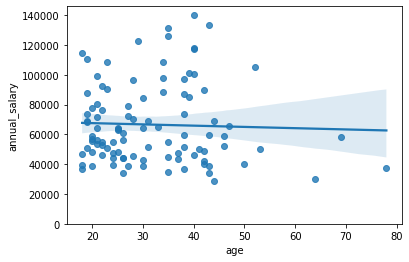

In [94]:
# Age as potential predictor variable of Annual salary
sns.regplot(x="age", y="annual_salary", data=df3)
plt.ylim(0,)

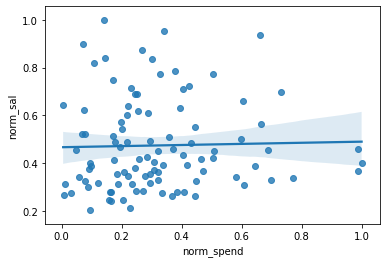

In [95]:
# purchases/sales spending as potential predictor variable of Annual salary (normalized)
sns.regplot(x="norm_spend", y="norm_sal", data=df3)

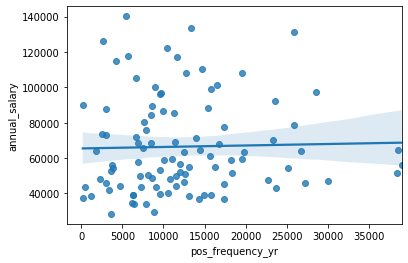

In [96]:
# purchases/sales spending as potential predictor variable of Annual salary
sns.regplot(x="pos_frequency_yr", y="annual_salary", data=df3)

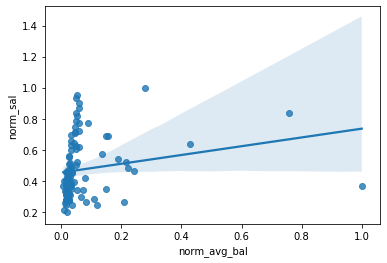

In [97]:
#  average bank balance as potential predictor variable of Annual salary (normalized)
sns.regplot(x="norm_avg_bal", y="norm_sal", data=df3)

In [98]:
df3[["norm_avg_bal","norm_sal"]].corr() 

,norm_avg_bal,norm_sal
norm_avg_bal,1.000000,0.198755
norm_sal,0.198755,1.000000


In [99]:
q = df3["norm_avg_bal"].quantile(0.85)
df_filtered = df3[df3["norm_avg_bal"] < q]
df_filtered.head()

,customer_id,avg_balance,age,salary_92,frequency,frequency_per_yr,annual_salary,sum_balance,sum_pos_92,pos_frequency_yr,norm_sal,norm_spend,norm_avg_bal
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109,54539.85,1810.86,7184.390217,0.356953,0.184420,0.017865
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239,464628.82,3975.82,15773.633696,0.708765,0.404902,0.045270
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652,372880.59,4389.54,17415.022826,0.325348,0.447036,0.022117
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457,709979.24,3885.75,15416.290761,0.629474,0.395729,0.033368
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196,3582356.98,4940.61,19601.333152,0.773149,0.503158,0.090281


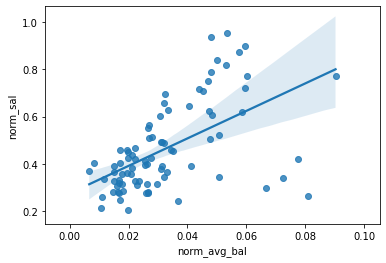

In [100]:
#  average bank balance as potential predictor variable of Annual salary (normalized, outlier check)
sns.regplot(x="norm_avg_bal", y="norm_sal", data=df_filtered)

(0, 145814.8109333909)

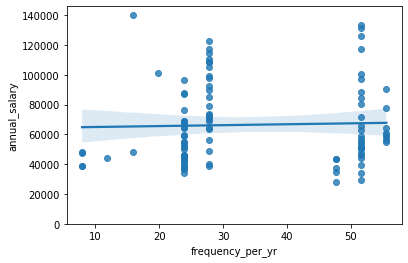

In [101]:
# Frequency of pay as potential predictor variable of Annual salary
sns.regplot(x="frequency_per_yr", y="annual_salary", data=df3)
plt.ylim(0,)

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [102]:
from scipy import stats

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [103]:
pearson_coef, p_value = stats.pearsonr(df3['age'], df3['annual_salary'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.03650390406614126  with a P-value of P = 0.7184210621329886


In [104]:
pearson_coef, p_value = stats.pearsonr(df3['norm_spend'], df3['norm_sal'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.026141138001610317  with a P-value of P = 0.7962765551490671


In [105]:
pearson_coef, p_value = stats.pearsonr(df3['norm_avg_bal'], df3['norm_sal'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.19875535593177224  with a P-value of P = 0.04743559665790679


In [106]:
pearson_coef, p_value = stats.pearsonr(df_filtered['norm_avg_bal'], df_filtered['norm_sal'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5558647398725508  with a P-value of P = 3.342452954419962e-08


## Since only average balance (that is normalized and excluded of outliers) gives an acceptable p value we can build a simple regression model based on it 

In [107]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
X = df_filtered[['avg_balance']]
Y = df_filtered['annual_salary']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
Yhat=lm.predict(X)
Yhat[0:10]  

array([ 53087.13981982,  75450.16275381,  56556.74900749,  65737.78344288,
       112179.00730723,  67011.99013539,  54775.89572514,  54273.23841637,
        56733.96162851,  59897.77912193])

In [110]:
lm.intercept_

38509.10902085328

In [111]:
lm.coef_

array([3.08943941])

(0, 149752.22362356467)

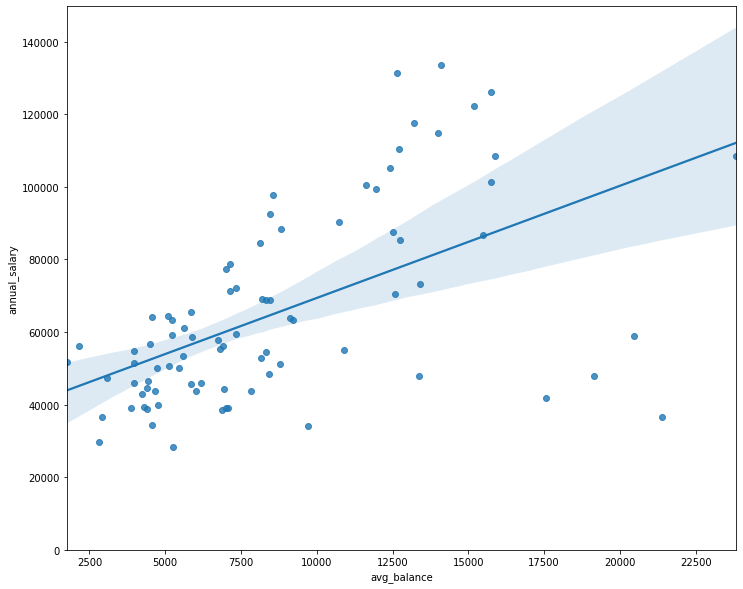

In [112]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="avg_balance", y="annual_salary", data=df_filtered)
plt.ylim(0,)

## Simple Regression model
<b>annual_salary</b> = 38509.10902085328 + 3.08943941 x  <b>avg_balanceg</b>

Since a a simple regression model cannot be pursued to predict the annual salary for each customer we will use the decision tree approach to figure out how the selected attributes affect annula salary. For that we convert the continuous numerical variables to ranges by binning the attributes

In [113]:
bins = np.linspace(min(df3["avg_balance"]), max(df3["avg_balance"]), 4)
bins

array([  1755.89230769,  89213.27709402, 176670.66188034, 264128.04666667])

In [114]:
group_names = ['Low', 'Medium', 'High']
df3['avg_balance_binned'] = pd.cut(df3['avg_balance'], bins, labels=group_names, include_lowest=True )
df3[['avg_balance','avg_balance_binned']].head()

,avg_balance,avg_balance_binned
0,4718.665385,Low
1,11957.202857,Low
2,5841.720000,Low
3,8813.467692,Low
4,23845.717143,Low


In [115]:
bins1 = np.linspace(min(df3["age"]), max(df3["age"]), 4)
group_names = ['Young', 'Middle', 'Old']
df3['age_binned'] = pd.cut(df3['age'], bins1, labels=group_names, include_lowest=True )
df3[['age','age_binned']].head()

,age,age_binned
0,53,Middle
1,21,Young
2,28,Young
3,34,Young
4,34,Young


In [116]:
bins2 = np.linspace(min(df3["frequency_per_yr"]), max(df3["frequency_per_yr"]), 4)
group_names = ['Low', 'Medium', 'High']
df3['frequency_per_yr_binned'] = pd.cut(df3['frequency_per_yr'], bins2, labels=group_names, include_lowest=True )
df3[['frequency_per_yr','frequency_per_yr_binned']].head()

,frequency_per_yr,frequency_per_yr_binned
0,51.576087,High
1,27.771739,Medium
2,23.804348,Medium
3,51.576087,High
4,27.771739,Medium


In [117]:
bins3 = np.linspace(min(df3["pos_frequency_yr"]), max(df3["pos_frequency_yr"]), 4)
group_names = ['Low', 'Medium', 'High']
df3['pos_frequency_yr_binned'] = pd.cut(df3['pos_frequency_yr'], bins3, labels=group_names, include_lowest=True )
df3[['pos_frequency_yr','pos_frequency_yr_binned']].head()

,pos_frequency_yr,pos_frequency_yr_binned
0,7184.390217,Low
1,15773.633696,Medium
2,17415.022826,Medium
3,15416.290761,Medium
4,19601.333152,Medium


In [118]:
bins4 = np.linspace(min(df3["annual_salary"]), max(df3["annual_salary"]), 4)
group_names = ['Low', 'Medium', 'High']
df3['annual_salary_binned'] = pd.cut(df3['annual_salary'], bins4, labels=group_names, include_lowest=True )
df3[['annual_salary','annual_salary_binned']].head()

,annual_salary,annual_salary_binned
0,50053.045109,Low
1,99385.334239,Medium
2,45621.270652,Low
3,88266.799457,Medium
4,108413.371196,High


In [119]:
df3.head()

,customer_id,avg_balance,age,salary_92,frequency,frequency_per_yr,annual_salary,sum_balance,sum_pos_92,pos_frequency_yr,norm_sal,norm_spend,norm_avg_bal,avg_balance_binned,age_binned,frequency_per_yr_binned,pos_frequency_yr_binned,annual_salary_binned
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109,54539.85,1810.86,7184.390217,0.356953,0.184420,0.017865,Low,Middle,High,Low,Low
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239,464628.82,3975.82,15773.633696,0.708765,0.404902,0.045270,Low,Young,Medium,Medium,Medium
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652,372880.59,4389.54,17415.022826,0.325348,0.447036,0.022117,Low,Young,Medium,Medium,Low
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457,709979.24,3885.75,15416.290761,0.629474,0.395729,0.033368,Low,Young,High,Medium,Medium
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196,3582356.98,4940.61,19601.333152,0.773149,0.503158,0.090281,Low,Young,Medium,Medium,High


In [144]:
df3.to_csv("salary.csv", index = False) #exporting the dataframe as a csv file